In [1]:
import allel
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sys.path.insert(0, '/home/jmurga/practicas/201910/bi/practica9/skCustomFunctions.py')
from skCustomFunctions import *

This practice will consist on the procesing of VCF files. It will include quality control, description of the data and statistics of genetic diversity. Each section must include a function that performs a basic operation and the application of advanced *scikit-allel* functions. We pretened to show the importance of the formats of inputs and outputs, as well as the workflow through raw information and the usage of packages.

Specifically *scikit-allel* allows working with arrays containing the genotype information of each position in the VCF. *GenotypesArrays*, *HaplotypesArrays* or *CountAlleleArray* are structures that store the information necessary to perform predefined measurements through genotypes or polymorphic sites.

For more information, you may review the raw information we can obtain from the different types of structures https://scikit-allel.readthedocs.io/en/stable/model/ndarray.html

### Reading VCF files

#### *allel.read_vcf*

This function allows us to read and access to the information saved in VCF files. It stores the information in a dictionary containing differents keys associated to *numpy* arrays and has several [parameters](https://scikit-allel.readthedocs.io/en/stable/io.html?highlight=read_vcf#allel.read_vcf), which allow us to create objects with only the required information for our purpose.

*Numpy* is a one of the most widely used Python library. Most of the packages are based on it and provides a multidimensional array object and an assortment of routines for fast operations on arrays, including mathematical, shape manipulation, sorting, selecting, basic linear algebra, basic statistical operations, random simulation and much more. We will use it only for storage and subset information, so don't be panic! It's widely used on machine and deep learning approaches!

In this practice we are going to teach how to open specific regions given a set of coordinats, as well as extract specific information from the VCF file. For this purpose we will use the parameters *input*, *fields*, *region* and *tabix*.

- *input*: path to VCF file on the local file system
- *region*: Genomic region from which variants will be extracted. If provided, should be a tabix-style region string (ex: **chr:start-end**). Be sure your chromosome name is like the *CHROM* annotation in the VCF file!
- *tabix*: name or path to [tabix](https://www.htslib.org/doc/tabix.html) executable. Only required if region is given. Just need to write tabix as string (ex: **tabix='tabix'**)
- *fields*: fields that will be extracted from the data. Should be a list of strings. It depends on the VCF information! If you are not sure what kind of information you could extract, open all fields in a tiny region (to avoid performance problems) and later select your favorites fields!

To check the information stored at the **VCF dictionary** you only need to access with the key like any other Python dictionary! Saving certain dictionary values on new variable will facilitate future works!

In [3]:
vcf = allel.read_vcf(input='/home/jmurga/practicas/201910/bi/practica9/chr2_gp_lesson9.vcf.gz',fields='*',region='2:135792491-136822774',tabix='tabix')
# Accessing to dictionary information after check a key
samples = vcf['samples']

In [4]:
type(vcf)

dict

In [5]:
vcf.keys()

dict_keys(['samples', 'calldata/GT', 'variants/AA', 'variants/AC', 'variants/AF', 'variants/AFR_AF', 'variants/ALT', 'variants/AMR_AF', 'variants/AN', 'variants/CHROM', 'variants/CIEND', 'variants/CIPOS', 'variants/CS', 'variants/DP', 'variants/EAS_AF', 'variants/END', 'variants/EUR_AF', 'variants/EX_TARGET', 'variants/FILTER_PASS', 'variants/ID', 'variants/IMPRECISE', 'variants/MC', 'variants/MEINFO', 'variants/MEND', 'variants/MLEN', 'variants/MSTART', 'variants/MULTI_ALLELIC', 'variants/NS', 'variants/POS', 'variants/QUAL', 'variants/REF', 'variants/SAS_AF', 'variants/SVLEN', 'variants/SVTYPE', 'variants/TSD', 'variants/VT', 'variants/altlen', 'variants/is_snp', 'variants/numalt'])

Once you know all the available fields, you may select your favourite ones.

In [6]:
vcf = allel.read_vcf(input='/home/jmurga/practicas/201910/bi/practica9/chr2_gp_lesson9.vcf.gz',fields=['AA','AC','AF','AN','CHROM','POS','VT','REF','MULTI_ALLELIC','samples','GT','ALT','QUAL','DP','numalt'],region='2:135792491-136822774',tabix='tabix')

Now you keep only the selected keys.

In [7]:
vcf.keys()

dict_keys(['samples', 'calldata/GT', 'variants/AA', 'variants/AC', 'variants/AF', 'variants/ALT', 'variants/AN', 'variants/CHROM', 'variants/DP', 'variants/MULTI_ALLELIC', 'variants/POS', 'variants/QUAL', 'variants/REF', 'variants/VT', 'variants/numalt'])

#### Transform raw vcf data to genetic information

*allel.read_vcf* also retrieves the genotype information for each record and sample at the VCF file in a *numpy* array. It is stored at *calldata/GT* key. To work with the genotype information and use the package option properly, you should transform the *numpy* array to a specific element that will be used to estimate different nucleotide variation or selection measures. We have four main objects regarding genotype data:

- <class 'allel.model.ndarray.GenotypeArray'>: Array of discrete genotype calls for a matrix of variants and samples
- <clas 'allel.model.ndarray.AlleleCountsArray'>: Array of allele counts
- <class 'allel.model.ndarray.GenotypeAlleleCountsArray'>: Array of genotype calls for a matrix of variants and samples, stored as allele counts per call
- <class 'allel.model.ndarray.HaplotypeArray'>: 2-dimensional numpy array of integers. By convention the first dimension corresponds to the variants genotyped, the second dimension corresponds to the haplotypes

Each integer within the array corresponds to an allele index, where 0 is the reference allele, 1 is the first alternate allele, 2 is the second alternate allele, … and -1 (or any other negative integer) is a missing allele call.

The basic structure will be the 'allel.model.ndarray.GenotypeArray' from which we could transform, measure and select any variant and sample in many ways. So first of all you need to transform your genotype data in a GenotypeArray as bellow:

In [8]:
# Transform raw data to GenotypeArray. gt variable is the most important variable to work with!
gt = allel.GenotypeArray(vcf['calldata/GT'])
# Get the allel count from genotypes
ac = gt.count_alleles()
# Get the allele count calling for a matrix of variants and samples
gtAcArray = gt.to_allele_counts()
# Transform the genotype information to haplotypes
hap = gt.to_haplotypes()

In [9]:
gt

<GenotypeArray shape=(27360, 2261, 2) dtype=int8>
0/0 0/0 0/0 1/0 1/0 ... 1/0 0/1 1/0 0/1 0/0
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
...
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
0/0 0/0 0/0 0/0 0/0 ... 1/0 0/1 0/0 0/1 0/0
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0

In [10]:
hap

<HaplotypeArray shape=(27360, 4522) dtype=int8>
0 0 0 0 0 ... 0 0 1 0 0
0 0 0 0 0 ... 0 0 0 0 0
0 0 0 0 0 ... 0 0 0 0 0
...
0 0 0 0 0 ... 0 0 0 0 0
0 0 0 0 0 ... 0 0 1 0 0
0 0 0 0 0 ... 0 0 0 0 0

What do rows and columns represent?

**Saving basic info through *scikit-allel* variables in the simplest ones**

In [11]:
# samples = vcf['samples']
pos = vcf['variants/POS']
# variantType = vcf['variants/VT']
# multiAllelic = vcf['variants/MULTI_ALLELIC']
# AA = vcf['variants/POS']
# AC = vcf['variants/AC']
# AN = vcf['variants/AN']
# AF = vcf['variants/AF']
# REF = vcf['variants/POS']
# ALT = vcf['variants/ALT']

### Explore variant attributes and filters

Here we will write a function to bin raw information extracted from *scikit-allel*, another one to plot the density of variants, and a last one to plot a histogram of the differents attributes. The inputs are attributes stored in the VCF file.

In [12]:
help(variantsByWindows)

Help on function variantsByWindows in module skCustomFunctions:

variantsByWindows(variants, windowSize, density=True, title=None)
    Function to plot the total number of variants along the VCF.
    
    Parameters
    ----------
    variants: variable containing total number of variants at the VCF file
    windowsSize: step to plot
    density: numberOfVariants/windowsSize
    title: string to plot a title
    
    Returns
    -------
    Plot SNPs by windows depending on density



In [13]:
help(plotVariantHist)

Help on function plotVariantHist in module skCustomFunctions:

plotVariantHist(vcfInput, attribute, bins=30)
    Function to make an histogram of VCF attributes.
    
    Parameters
    ----------
    vcfInput: variable containing raw VCF information
    attribute: str field name to plot 
    bins: number of bins to group the histogram
    
    Returns
    ----------
    Histogram of attributes



#### Variant density by windows

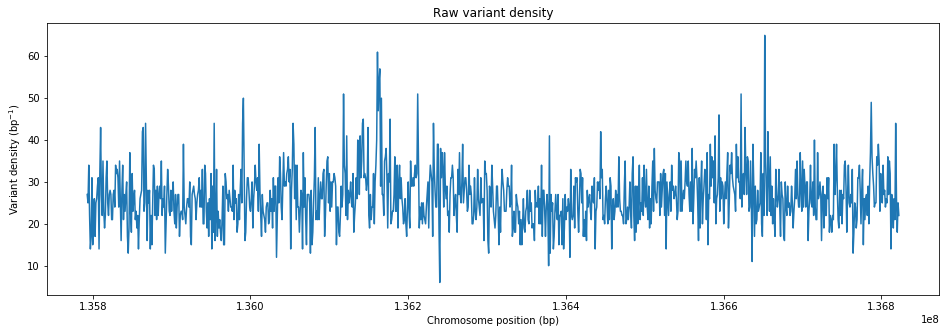

In [14]:
variantsByWindows(variants=pos, windowSize=1000, density=False, title='Raw variant density')

#### Histogram from vcf attributes

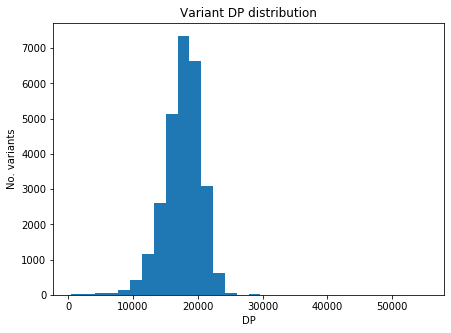

In [15]:
plotVariantHist(vcf,'DP',bins=30)

#### Filtering variants

##### Filtering variants by positions and attributes

As we have previously seen, variables are saved in numpy arrays or GenotypesArrays. Let's check how to filter a numpy array and *scikit-allel* structures.

Numpy arrays are like a list, but you don't need to iterate them in order to check the values they contain. So the way to filter numpy arrays or a *scikit-allel* structure is by defining boolean conditions into the values. You can access the values and write boolean conditions using a list syntax.

Before performing any operation, be sure your numerical array is ordered!

In [16]:
vcf['variants/POS'] = np.sort(vcf['variants/POS'])

Access the 10 first variants of the array from the vcf (**numpy array**) and the 10 first genotypes (**sckit-allel structure**). It's the same syntax!

In [17]:
np.sort(vcf['variants/POS'][0:10])

array([135792528, 135792542, 135792554, 135792588, 135792666, 135792672,
       135792673, 135792710, 135792737, 135792921], dtype=int32)

In [18]:
gt[0:10]

<GenotypeArray shape=(10, 2261, 2) dtype=int8>
0/0 0/0 0/0 1/0 1/0 ... 1/0 0/1 1/0 0/1 0/0
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
...
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0

You may also access to variants given a range of coordinates through boolean conditions on arrays

In [19]:
vcf['variants/POS'][(vcf['variants/POS'] > 135830967) & (vcf['variants/POS'] < 135869682)]

array([135831055, 135831056, 135831059, 135831081, 135831192, 135831255,
       135831260, 135831343, 135831404, 135831440, 135831451, 135831472,
       135831593, 135831637, 135831683, 135831685, 135831743, 135831798,
       135831822, 135831848, 135831859, 135831870, 135831891, 135831917,
       135831933, 135831994, 135832014, 135832057, 135832070, 135832082,
       135832083, 135832123, 135832131, 135832180, 135832192, 135832194,
       135832337, 135832360, 135832389, 135832478, 135832485, 135832486,
       135832516, 135832554, 135832611, 135832658, 135832721, 135832723,
       135832747, 135832757, 135832765, 135832779, 135832835, 135832877,
       135832899, 135832953, 135832970, 135833014, 135833021, 135833220,
       135833248, 135833253, 135833299, 135833380, 135833492, 135833508,
       135833521, 135833533, 135833540, 135833547, 135833566, 135833576,
       135833578, 135833625, 135833700, 135833725, 135833737, 135833753,
       135833760, 135833767, 135833768, 135833773, 

If you want to extract the genotypes of a given set of coordinates, you first need to create an index. 

In [20]:
variantsIndex = allel.SortedIndex(vcf['variants/POS'])

In [21]:
print(pos.shape)
print(gt.shape)

(27360,)
(27360, 2261, 2)


In [22]:
variantsIndex

0,1,2,3,4,...,27355,27356,27357,27358,27359
135792528,135792542,135792554,135792588,135792666,...,136822642,136822669,136822675,136822738,136822741


Check again your genotype array: the columns are the variants, so you need to relate the positions with index of the genotype array. For example the first position on positions array (135792528) is the first element on the genotype array, but this number does not correspond to the first element on the genotype array! So let's to check how to do that.

In [23]:
pos

array([135792528, 135792542, 135792554, ..., 136822675, 136822738,
       136822741], dtype=int32)

In [24]:
gt

<GenotypeArray shape=(27360, 2261, 2) dtype=int8>
0/0 0/0 0/0 1/0 1/0 ... 1/0 0/1 1/0 0/1 0/0
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
...
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
0/0 0/0 0/0 0/0 0/0 ... 1/0 0/1 0/0 0/1 0/0
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0

First extract the index of the selected positions using *np.where()* function

In [25]:
selectedIndex = np.where((variantsIndex > 135830967) & (variantsIndex < 135869682))

In [26]:
selectedIndex = (variantsIndex > 135830967) & (variantsIndex < 135869682)

Now subset the positions from the genotype array

In [27]:
gt[selectedIndex]

<GenotypeArray shape=(998, 2261, 2) dtype=int8>
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
...
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0

In [28]:
vcf['variants/DP'] > 18000

array([False, False, False, ..., False,  True,  True])

In [29]:
# depthFilter = gt[np.where(vcf['variants/DP'] > 18000)]
depthFilter = gt[vcf['variants/DP'] >= 18000]
depthFilter

<GenotypeArray shape=(13380, 2261, 2) dtype=int8>
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
...
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
0/0 0/0 0/0 0/0 0/0 ... 1/0 0/1 0/0 0/1 0/0
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0

In [30]:
print(gt.shape)
print(depthFilter.shape)

(27360, 2261, 2)
(13380, 2261, 2)


##### Filtering by genetic properties

There are a few common properties of sites that are useful to compute nucleotide or selection measures, such as whether a site is polymorphic or not. Instead of checking all the indexes of these positions and then filter, *scikit-allel* provides several functions to filter the whole vcf files according to these properties. These functions perform operations over *allel.model.ndarray.AlleleCountsArray* objects to extract the corresponding positions:
- is_segregating()
- is_biallelic_01()

In [31]:
seg = ac.is_segregating()
gtSeg = gt[seg]
bi = ac.is_biallelic_01()

Now we have one array of shape N containing the segregating positions. To extract the genotype we only need to filter the genotype array

In [32]:
print('Number of variant',gt.shape)
print('Number of segregating variants',gt[seg].shape)
print('Number of biallelic variants',gt[bi].shape)

Number of variant (27360, 2261, 2)
Number of segregating variants (26156, 2261, 2)
Number of biallelic variants (26029, 2261, 2)


In [33]:
gt.is_hom()

array([[ True,  True,  True, ..., False, False,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True, False,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

Other options allow us to extract directly the genotypes based on differents properties, like biallelic sites, or heterozygous sites:
- is_het()
- is_missing()
- is_hom()
- is_hom_ref()
- is_hom_alt()

In [34]:
gt.is_het()
gt.is_hom_ref()

array([[ True,  True,  True, ..., False, False,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True, False,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

Remember to apply your filter in the required variables before performing any other operation! If you do not apply them, variables will have different length, and python will not be able to operate on them!

In [35]:
print(ac[seg].shape)

(26156, 5)


##### Filtering by samples

The option to filter by samples allows us to execute the pipeline over a given set of individuals, populations or metapopulations. To subset samples we need a file containing all the samples inside the vcf files that associate each of them to one attribute (population, metapopulation, sex, etc.). 

In [36]:
vcf['samples']

array(['HG00096', 'HG00097', 'HG00099', ..., 'NA21141', 'NA21143',
       'NA21144'], dtype=object)

Opening file containing samples information

In [37]:
npSamples = np.loadtxt('/data/shared/1000GP/samples/allPanel.txt', dtype='str',delimiter='\t')

In [38]:
npSamples

array([['HG00096', 'GBR', 'EUR', 'male'],
       ['HG00097', 'GBR', 'EUR', 'female'],
       ['HG00099', 'GBR', 'EUR', 'female'],
       ...,
       ['NA21141', 'GIH', 'SAS', 'female'],
       ['NA21143', 'GIH', 'SAS', 'female'],
       ['NA21144', 'GIH', 'SAS', 'female']], dtype='<U7')

Check we have exactly the sames individuals

In [39]:
np.unique(vcf['samples'] == npSamples[:,0],return_counts=True)

(array([ True]), array([2261]))

For example if we want to perform an analysis over European populations we just need to create a boolean filter to subset using the proper column. 

In [40]:
eurFilter = npSamples[:,2] == 'EUR'
npSamplesFilter = npSamples[eurFilter]

Now we can subset the whole genotype information to extract only the European genotypes using the *subset()* function. It takes two inputs: one to select the variants and another one to select the samples. In this case, we will filter by samples only, so we will create a boolean array to include all the variants (all positions will be *True*)

In [41]:
print(np.array(gt.shape[0]*[True]))
print(np.array(gt.shape[0]*[True]).shape)
print(gt.shape)

[ True  True  True ...  True  True  True]
(27360,)
(27360, 2261, 2)


In [42]:
## Boolean array of n shape to include all the variants without filtering
gtSubset = gt.subset(np.array(gt.shape[0]*[True]),eurFilter)

In [43]:
gtSubset

<GenotypeArray shape=(27360, 489, 2) dtype=int8>
0/0 0/0 0/0 1/0 1/0 ... 1/0 0/0 0/0 0/1 0/1
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
...
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0

### Basic nucleotide diversity measures

In [44]:
help(statisticsByWindows)

Help on function statisticsByWindows in module skCustomFunctions:

statisticsByWindows(positions, statisticValues, statisticName=None, title=None)
    Function to make an line chart representing statistics values by windows
    
    Parameters
    ----------
    positions: ndarray containing windows analyzed by scikit-allel
    statisticsValues: ndarray containing values calculated on genomic regions
    windowsSize: windows size analyzed 
    statiscticName: string to plot the statistic name analyzed
    title: string to plot a title
    Returns
    -------
    Line Chart



These measurements are calculated both overall a region and in sliding windows. They have as input *ac* (AllelCountsArray) and *pos* (array with open positions). Again we should filter *ac* so that it contains only segregating or biallelic positions. In this example we are going to estimate [Tajima's D](https://www.genetics.org/content/123/3/585) by sliding windows, but there are a bunch of statitics available.

Estimators included in *scikit-allel*:
- *allel.mean_pairwise_difference(ac, an=None, fill=nan)*: Calculate for each variant the mean number of pairwise differences between chromosomes sampled from within a single population. Check gt vs segregating
- *allel.sequence_diversity(pos, ac, start=None, stop=None, is_accessible=None)*: Estimate nucleotide diversity within a given region, which is the average proportion of sites (including monomorphic sites not present in the data) that differ between randomly chosen pairs of chromosomes.
- *allel.windowed_diversity(pos, ac, size=None, start=None, stop=None, step=None, windows=None, is_accessible=None, fill=nan)*: Estimate nucleotide diversity in windows over a single chromosome/contig.
- *allel.watterson_theta(pos, ac, start=None, stop=None, is_accessible=None)*: Calculate the value of Watterson’s estimator over a given region.
- *allel.windowed_watterson_theta(pos, ac, size=None, start=None, stop=None, step=None, windows=None, is_accessible=None, fill=nan)*:Calculate the value of Watterson’s estimator in windows over a single chromosome/contig.
- *allel.tajima_d(ac, pos=None, start=None, stop=None, min_sites=3)*: Calculate the value of Tajima’s D over a given region.
- *allel.windowed_tajima_d(pos, ac, size=None, start=None, stop=None, step=None, windows=None, min_sites=3)*: Calculate the value of Tajima’s D in windows over a single chromosome/contig.

#### Tajima's D

Tajima's D is a statistic of neutrality based on both the allele frequency spectrum and the levels of variability. It measures the difference between two estimators of the population variability: the nucleotide polymorphism \theta, and the nucleotide diversity \pi.  

Under neutrality, both estimators are expected to be approximately equal. In the test, significant deviations from zero are indicative of selection. Positive alues are found when there is an excess of intermediate frequency alleles, hich can result from balancing selection, but also from bottlenecks. On the other hand, negative values arise from an excess of low-frequency alleles and can result from positive selection, but also from population expansions.

Again, to start working with, we need to retrieve genotype data and transform it to allele counts!

In [45]:
gt

<GenotypeArray shape=(27360, 2261, 2) dtype=int8>
0/0 0/0 0/0 1/0 1/0 ... 1/0 0/1 1/0 0/1 0/0
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
...
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
0/0 0/0 0/0 0/0 0/0 ... 1/0 0/1 0/0 0/1 0/0
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0

In [46]:
gt

<GenotypeArray shape=(27360, 2261, 2) dtype=int8>
0/0 0/0 0/0 1/0 1/0 ... 1/0 0/1 1/0 0/1 0/0
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
...
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
0/0 0/0 0/0 0/0 0/0 ... 1/0 0/1 0/0 0/1 0/0
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0

In [47]:
ac = gt.count_alleles()
ac

<AlleleCountsArray shape=(27360, 5) dtype=int32>
2903 1619    0    0    0
4520    2    0    0    0
4521    1    0    0    0
...
4521    1    0    0    0
4055  467    0    0    0
4519    3    0    0    0

We are using the *gt* object, which contains all the variants and genotypes. **Remember that at this point you could subset the data by variants and/or populations to limit the analysis!**

The inputs of functions related with nucleotide diversity will always be the allele count of segregating sites and the position array!

In [48]:
bi = ac.is_biallelic_01()
onlyBiallelic = ac[bi]
onlyBiallelic

<AlleleCountsArray shape=(26029, 5) dtype=int32>
2903 1619    0    0    0
4520    2    0    0    0
4521    1    0    0    0
...
4521    1    0    0    0
4055  467    0    0    0
4519    3    0    0    0

In [49]:
pos = vcf['variants/POS']
pos = pos[bi]

*windowed_tajima_d()* function returns three outputs: *D* values, windows were the statistics have been estimated, and the number of variants in each window.

In [50]:
D, windows, counts = allel.windowed_tajima_d(pos, onlyBiallelic, size=10000, step=10000,min_sites=1)
D[:10]

array([-0.66625165, -2.28583901, -2.26490746, -2.27460374, -2.40795139,
       -2.35297383, -1.86692316, -2.1390874 , -2.08653696, -2.29603454])

In [51]:
help(statisticsByWindows)

Help on function statisticsByWindows in module skCustomFunctions:

statisticsByWindows(positions, statisticValues, statisticName=None, title=None)
    Function to make an line chart representing statistics values by windows
    
    Parameters
    ----------
    positions: ndarray containing windows analyzed by scikit-allel
    statisticsValues: ndarray containing values calculated on genomic regions
    windowsSize: windows size analyzed 
    statiscticName: string to plot the statistic name analyzed
    title: string to plot a title
    Returns
    -------
    Line Chart



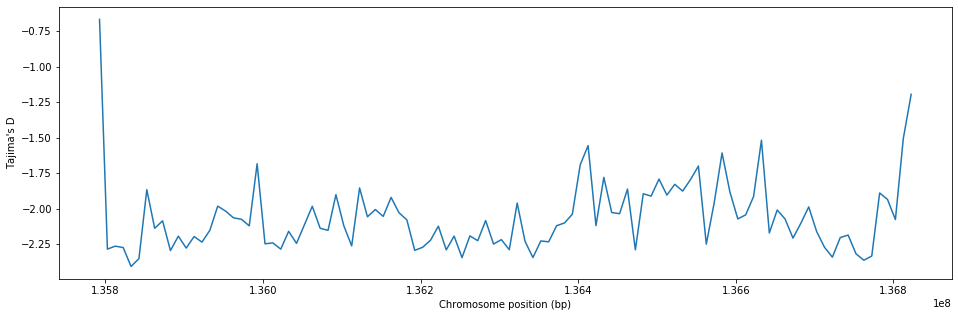

In [52]:
statisticsByWindows(positions=windows,statisticValues=D,statisticName="Tajima's D")

### Principal Component Analysis

#### Opening genotype data and subsetting by populations

Principal components analysis (PCA) is a mainstay of population genetics, providing a model-free method for exploring patterns of relatedness within a collection of individuals. PCA was introduced as a tool for genetic analysis by Patterson, Price & Reich (2006). Subsequently, Gil McVean (2009) provided an analytical framework for understanding PCA in terms of genetic ancestry. However, although PCA is widely used and the analytical details are worked out, there are a number of practical issues that come up when trying to run PCA on large SNP datasets from next-generation sequencing experiments. For example, small changes in how you prepare the input data can make a big difference to the outputs.

First of all, let's define the inputs required to perform the PCA

In [53]:
## Variables including genetic information
gt = allel.GenotypeArray(vcf['calldata/GT'])
ac = gt.count_alleles()
gt

<GenotypeArray shape=(27360, 2261, 2) dtype=int8>
0/0 0/0 0/0 1/0 1/0 ... 1/0 0/1 1/0 0/1 0/0
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
...
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
0/0 0/0 0/0 0/0 0/0 ... 1/0 0/1 0/0 0/1 0/0
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0

In [54]:
bi = ac.is_biallelic_01()
onlyBiallelic = ac[bi]
# Input positions
pos = vcf['variants/POS']

In [55]:
## Save variant positions and their index to filter later
posAll = allel.SortedIndex(vcf['variants/POS'])
posAll

0,1,2,3,4,...,27355,27356,27357,27358,27359
135792528,135792542,135792554,135792588,135792666,...,136822642,136822669,136822675,136822738,136822741


We will perform a PCA analysis over three distinct populations only: CEU, CHB and YRI. Thus, we need to subset their genotypes from the VCF data.

In [56]:
npSamples = np.loadtxt('/data/shared/1000GP/samples/allPanel.txt', dtype='str',delimiter='\t')
npSamples.shape

(2261, 4)

In [57]:
np.unique(npSamples[:,1],return_counts=True)

(array(['ACB', 'ASW', 'BEB', 'CDX', 'CEU', 'CHB', 'CHS', 'CLM', 'ESN',
        'FIN', 'GBR', 'GIH', 'GWD', 'IBS', 'ITU', 'JPT', 'KHV', 'LWK',
        'MSL', 'MXL', 'PEL', 'PJL', 'PUR', 'STU', 'TSI', 'YRI'],
       dtype='<U7'),
 array([ 92,  45,  83,  82,  94, 102,  99,  80,  86,  99,  85,  96,  96,
        107,  86, 100,  98,  76,  75,  58,  79,  66, 100,  66, 104, 107]))

Selecting data from the three populations

In [58]:
sampleSelection = (npSamples[:,1] == 'CHB') | (npSamples[:,1] == 'CEU') | (npSamples[:,1] == 'YRI')
np.unique(sampleSelection,return_counts=True)

(array([False,  True]), array([1958,  303]))

Subsetting populations from data

In [59]:
samplesSubset = npSamples[sampleSelection]
samplesSubset.shape

(303, 4)

In [60]:
np.unique(samplesSubset[:,1],return_counts=True)

(array(['CEU', 'CHB', 'YRI'], dtype='<U7'), array([ 94, 102, 107]))

In [61]:
%%time
## Boolean array of n shape to include all the variants without filtering
gtSubset = gt.subset(np.array(gt.shape[0]*[True]),sampleSelection)

CPU times: user 228 ms, sys: 12 ms, total: 240 ms
Wall time: 239 ms


Checking that we subsetted the individuals properly

In [62]:
print(gt.shape)
print(gtSubset.shape)

(27360, 2261, 2)
(27360, 303, 2)


In [63]:
ac = gtSubset.count_alleles()
ac

<AlleleCountsArray shape=(27360, 5) dtype=int32>
428 178   0   0   0
605   1   0   0   0
606   0   0   0   0
...
606   0   0   0   0
540  66   0   0   0
606   0   0   0   0

Before going any further, we will remove singletons and multiallelic SNPs for simplicity. 

How many multiallelic SNPs are present in the data?

In [64]:
np.count_nonzero(ac.max_allele() > 1)

81

How many biallelic singletons are present in the data?

In [65]:
np.count_nonzero((ac.is_biallelic_01()) & ac.is_singleton(1))

3489

Now let's apply the filters

In [66]:
flt = (ac.is_biallelic_01()) & (ac[:,1:2].min(axis=1) > 1)
# gf = gt.compress(flt, axis=0)
gf = gtSubset[flt]
gf

<GenotypeArray shape=(6253, 303, 2) dtype=int8>
1/0 0/1 0/0 0/0 0/1 ... 1/1 0/0 0/0 1/1 0/0
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
...
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0

Finally, let's transform the genotype data into a 2-dimensional matrix where each cell has the number of non-reference alleles per call. This is what we’ll use as input to perform the PCA in *scikit-allel*

In [67]:
gn = gf.to_n_alt()
gn.shape

(6253, 303)

In [68]:
gn

array([[1, 1, 0, ..., 0, 2, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int8)

#### Removing correlated features (LD pruning)

In [69]:
help(plotLd)

Help on function plotLd in module skCustomFunctions:

plotLd(gn, title)
    Function to estimate linkage disequilibrium parameter r for each pair of variants using the method of Rogers and Huff (2008) and plot a matrix of genotype linkage disequilibrium values between all pairs of variants.
    
    Parameters
    ----------
    gn: genotype array
    title: string to plot a title
    
    Returns
    -------
    Scatter plot showing LD between all pairs of variants



In [70]:
help(ldPrune)

Help on function ldPrune in module skCustomFunctions:

ldPrune(gn, size, step, threshold=0.1, n_iter=1)
    Function to remove correlated SNPs. Locate SNPs that are not correlated with each other, using the locate_unlinked() function from scikit-allel. Works by sliding a window along the data, computing pairwise LD between all SNPs within each window, then removing one SNP from each correlated pair.
    
    Parameters
    ----------
    gn: genotype array
    size: string to plot a title
    size : int, optional
            The window size (number of bases).
    step : int, optional
            The distance between start positions of windows. If not given,
            defaults to the window size, i.e., non-overlapping windows.
    Returns
    -------
    Genotype variable without correlated SNPs



In [71]:
help(figPca)

Help on function figPca in module skCustomFunctions:

figPca(coords, model, title, sample_population=None)
        Parameter
        -------
    coords : ndarray, float, shape (n_samples, n_components)
        Transformed coordinates for the samples.
    model : GenotypePCA
        Model instance containing the variance ratio explained and the stored
        components (a.k.a., loadings). Can be used to project further data
        into the same principal components space via the transform() method.
        title : string to plot a title
        sample_populations : ndarray of populations analyzed
    
        Return
        -------
        PCA plot



PCA works best when the features you provide as input are independent from each other. Here each SNP is a feature. However, as DNA is transmitted from one generation to the next, genotypes at nearby SNPs tend to segregate as a block and be correlated, with the correlation (linkage disequlibrium) decaying as you increase the separation between SNPs.

We can get a sense of that correlation structure by visualising pairwise linkage disequilibrium in the first 1000 SNPs.

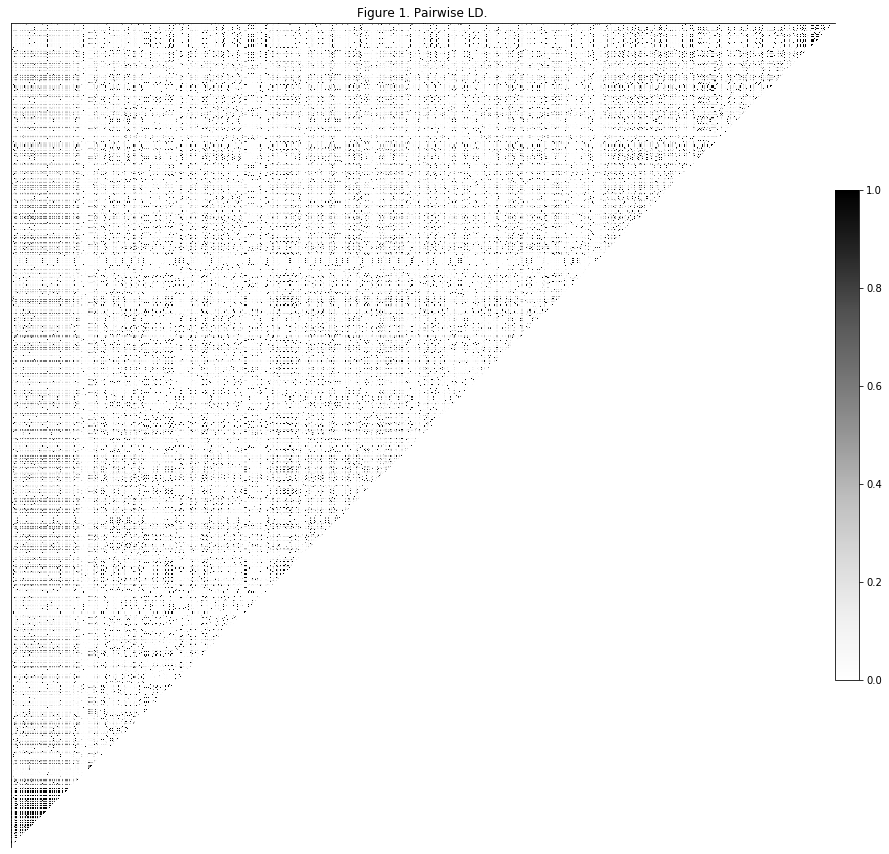

In [72]:
plotLd(gn[:1000], 'Figure 1. Pairwise LD.')

The darker regions in the plot above indicate pairs of SNPs where genotypes are correlated.

Before we deal with this correlation directly, we are going to thin down the data a bit. There are X SNPs left after the initial filtering steps above, and analysing this many features would be slow. Here we are more concerned with running an exploratory analysis, so we are going to randomly choose a subset of these SNPs to work with. This should still reveal the main signals in the data, while making runtime faster.

In [73]:
# number of SNPs to choose randomly
n = 5000  
vidx = np.random.choice(gn.shape[0], n, replace=False)
vidx.sort()
gnr = gn.take(vidx, axis=0)
gnr

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [1, 0, 0, ..., 1, 2, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int8)

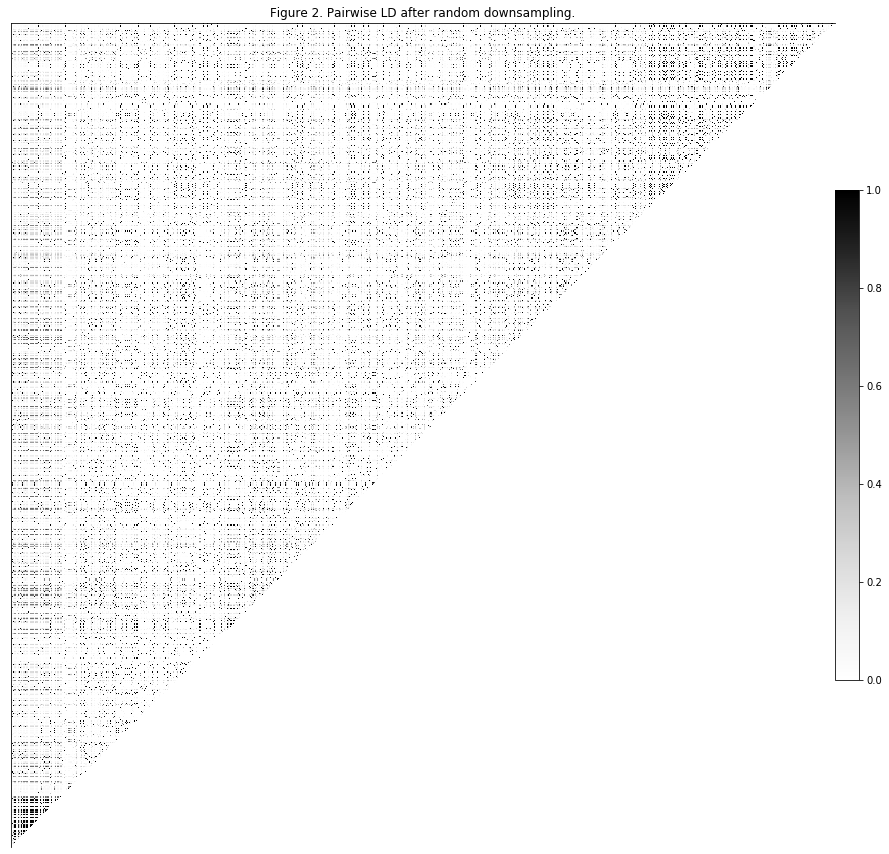

In [74]:
plotLd(gnr[:1000], 'Figure 2. Pairwise LD after random downsampling.')

You can see that much of the correlation is gone. However, depending how dusty your screen is, you may be able to see some speckling, indicating that there are still some correlated SNPs in the dataset.

To remove this remaining correlation, we are going to explicitly locate SNPs that are not correlated with each other, using the *locate_unlinked()* function from scikit-allel. This is known as **LD pruning**, and works by sliding a window along the data, computing pairwise LD between all SNPs within each window, then removing one SNP from each correlated pair.

In [75]:
gnu = ldPrune(gn, size=500, step=200, threshold=.1, n_iter=2)

iteration 1 retaining 821 removing 5432 variants
iteration 2 retaining 223 removing 598 variants


In [76]:
print(gn.shape)
print(gnu.shape)

(6253, 303)
(223, 303)


We reduce our data to SNPs with R' values fewer than 0.1

**Conventional PCA**

In [77]:
coords1, model1 = allel.pca(gnu, n_components=10, scaler='patterson')

To help visualise the results, we need to pull in some metadata about which population each individual belongs to.

In [78]:
populations = npSamples[(npSamples[:,1] == 'CHB') | (npSamples[:,1] == 'CEU') | (npSamples[:,1] == 'YRI')][:,1]

In [79]:
## All populations colors
pop_colours = {
    'ACB':'#faf8b9',
    'ASW':'#fafabe',
    'BEB':'#8e3ea3',
    'CDX':'#008f00',
    'CEU':'#2d74b2',
    'CHB':'#33b033',
    'CHS':'#37b337',
    'CLM':'#ab3b35',
    'ESN':'#f5ec05',
    'FIN':'#6fa6d6',
    'GBR':'#5691c4',
    'GWD':'#f7f14a',
    'IBS':'#8ab9e3',
    'ITU':'#c587d6',
    'JPT':'#6dd66d',
    'KHV':'#90de90',
    'LWK':'#faf56b',
    'MSL':'#f5f287',
    'MXL':'#ba5852',
    'PEL':'#cc7570',
    'PJL':'#d5a3e3',
    'PUR':'#de9d99',
    'STU':'#d3a2de',
    'TSI':'#acd1f2',
    'YRI':'#f5f39f',
    'GIH':'#c587d6'
}

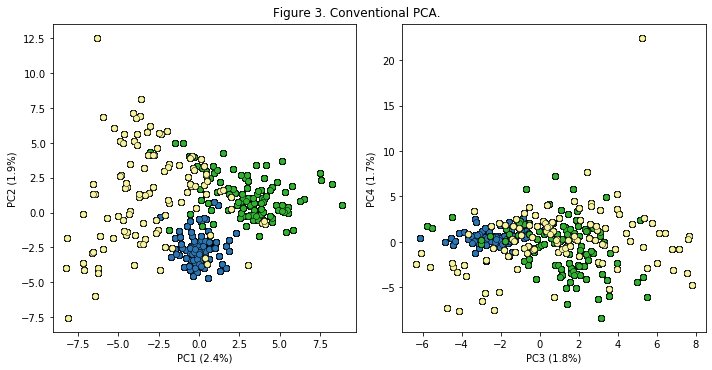

In [80]:
figPca(coords1, model1, 'Figure 3. Conventional PCA.',populations)

**PCA without linkage desiquilibrium filtering**

In [81]:
coords2, model2 = allel.pca(gnr, n_components=10, scaler='patterson')

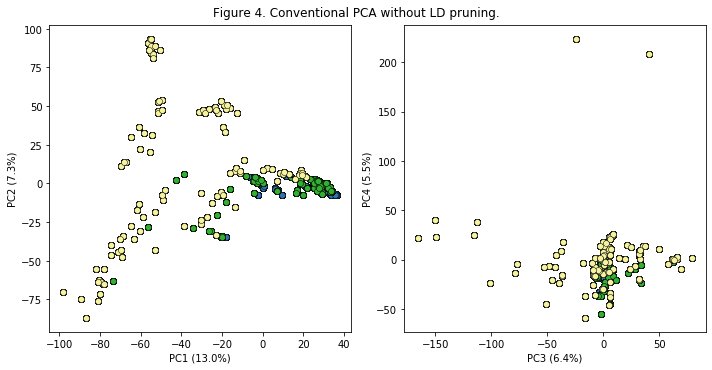

In [82]:
figPca(coords2, model2, 'Figure 4. Conventional PCA without LD pruning.',populations)

### Site Frequency Spectra

In [83]:
gt

<GenotypeArray shape=(27360, 2261, 2) dtype=int8>
0/0 0/0 0/0 1/0 1/0 ... 1/0 0/1 1/0 0/1 0/0
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
...
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
0/0 0/0 0/0 0/0 0/0 ... 1/0 0/1 0/0 0/1 0/0
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0

In [84]:
ac = gt.count_alleles()
ac

<AlleleCountsArray shape=(27360, 5) dtype=int32>
2903 1619    0    0    0
4520    2    0    0    0
4521    1    0    0    0
...
4521    1    0    0    0
4055  467    0    0    0
4519    3    0    0    0

In [85]:
biallelic = ac[ac.is_biallelic_01()][:,:2]
sfs = allel.sfs_folded(biallelic,n=biallelic.sum(axis=1).max())

In [86]:
sfs

array([    0, 11785,  2909, ...,     0,     0,     0])

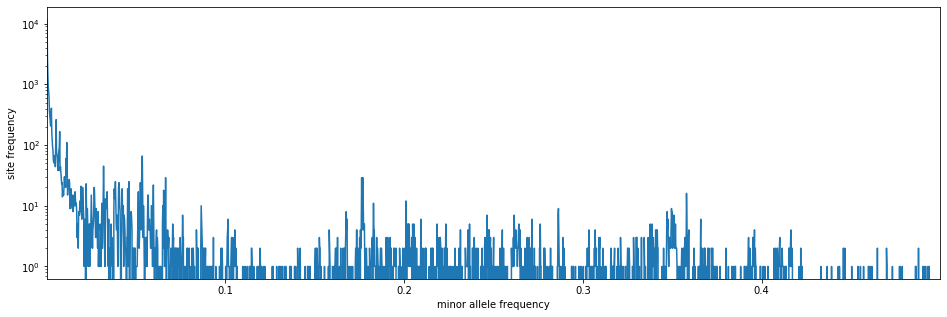

In [87]:
fig, ax = plt.subplots(figsize=(16,5))
allel.plot_sfs_folded(s=sfs,ax=ax,n=biallelic.sum(axis=1).max())

### Selection

In [88]:
help(ihsPlot)

Help on function ihsPlot in module skCustomFunctions:

ihsPlot(score, sites, ylabel, absolute=False)
    Function to make and scatter plot of iHS values
    
    Parameter
    -------
    score : ndarray of iHS value (unstandarized or standarized)
    sites: ndarray of analyzed sites
    
    Return
    -------
    Scatter plot



#### Integrated Haplotype Score

There are several metrics implemented in *scikit-allel* to measure selection. We are going to focus and estimate integrated haplotype score (**iHS**).

The test is based on the Extended Haplotype Homozygosity test (**EHH**) [Sabeti et al., 2002](https://www.nature.com/articles/nature01140?error=cookies_not_supported&code=fa339f71-4aba-442e-93c1-87692ec6f989), an approach that studies the relationship between a specific allele’s frequency and the extent of LD in the adjoining loci to that allele to detect recent selection. 

Sabeti et al. define EHH as *the probability that two randomly chosen chromosomes carrying the core haplotype of interest are identical by descent for the entire interval from the core region to the point x*. In brief, it captures the decay of identity along the distance of a haplotype carrying a specific allele at a position of interest whereas correcting for local variation in recombination rates (as they do influence the length of the haplotypes).

EHH values decrease from 1 to 0 with increasing distance from the core site. In case of strong positive selection, due to the rapid increment in frequency, haplotype homozygosity will tend to extend much further than expected under neutrality [Voight et al., 2006](https://journals.plos.org/plosbiology/article?id=10.1371/journal.pbio.0040072). Consequently, when plotting EHH against distance, the area under the curve will be greater for selected alleles than for those under neutrality

<img src="https://158.109.38.201:8888/notebooks/practicas/201910/practica9/ehhDecay.png" alt="drawing" style="width:600px;"/>

iHS tracks the decay of haplotype homozygosity for both the ancestral and the derived haplotypes. 
When the derived alleles are favored, the haplotype homozygosity decays much slower for the derived alleles than for the ancestral alleles. The discrepancy in the overall areas spanned by these two curves forms the basis of the iHS test of selection. From Voight et al. (2006). From the last observation and with the purpose of capturing this effect, iHH (integrated EHH) is defined as the sum of the EHH decay until reaching a threshold of 0.05 for both sides.

By computing iHH considering both the ancestral (iHH A ) and the derived (iHH D ) at each segregating site, the unstandardized value of iHS is obtained as follows:

\begin{equation}\label{ihs}
    iHS = \ln{\left(\frac{iHH_D}{iHH_A}\right)}
\end{equation}

Then in this case, the input will not be the genotypes but the haplotypes. We could transform a genotype object to an haplotype object.

In [89]:
vcf = allel.read_vcf(input='/home/jmurga/practicas/201910/bi/practica9/chr2_gp_lesson9.vcf.gz',fields=['AA','AC','AF','AN','CHROM','POS','VT','REF','MULTI_ALLELIC','samples','GT','ALT','QUAL','DP','numalt'],region='2:135792491-136822774',tabix='tabix')

In [90]:
pos = allel.SortedIndex(vcf['variants/POS'])
gt = allel.GenotypeArray(vcf['calldata/GT'])

First of all we will subset CEU population to perform the analysis

In [91]:
npSamples = np.loadtxt('/data/shared/1000GP/samples/allPanel.txt', dtype='str',delimiter='\t')

In [92]:
npSamples

array([['HG00096', 'GBR', 'EUR', 'male'],
       ['HG00097', 'GBR', 'EUR', 'female'],
       ['HG00099', 'GBR', 'EUR', 'female'],
       ...,
       ['NA21141', 'GIH', 'SAS', 'female'],
       ['NA21143', 'GIH', 'SAS', 'female'],
       ['NA21144', 'GIH', 'SAS', 'female']], dtype='<U7')

In [93]:
ceuFilter = npSamples[:,1] == 'CEU'
npSamplesFilter = npSamples[ceuFilter]

In [94]:
## Boolean array of n shape to include all the variants without filtering
gtSubset = gt.subset(np.array(gt.shape[0]*[True]),ceuFilter)

In [95]:
gtSubset

<GenotypeArray shape=(27360, 94, 2) dtype=int8>
1/0 0/1 0/0 0/0 0/1 ... 0/0 0/0 0/0 0/0 0/0
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
...
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0

In [96]:
print(gtSubset.shape)
print(pos.shape)

(27360, 94, 2)
(27360,)


Now we extract the haplotypes

In [97]:
hap = gtSubset.to_haplotypes()
type(hap)

allel.model.ndarray.HaplotypeArray

Note the diference between genotype and haplotype on the new structure

In [98]:
gtSubset[:10]

<GenotypeArray shape=(10, 94, 2) dtype=int8>
1/0 0/1 0/0 0/0 0/1 ... 0/0 0/0 0/0 0/0 0/0
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
...
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0

In [99]:
hap[:10]

<HaplotypeArray shape=(10, 188) dtype=int8>
1 0 0 1 0 ... 0 0 0 0 0
0 0 0 0 0 ... 0 0 0 0 0
0 0 0 0 0 ... 0 0 0 0 0
...
0 0 0 0 0 ... 0 0 0 0 0
0 0 0 0 0 ... 0 0 0 0 0
0 0 0 0 0 ... 0 0 0 0 0

Again, to start with, we need to retrieve genotype data and transform it to allele counts. In addition, to perform iHS we need to subset only biallelic variants, so first we will filter the haplotypes.

The inputs of the iHS estimation will be the haplotypes of biallelic sites and the position array.

In [100]:
hapAc = hap.count_alleles(max_allele=1)
hapAc

<AlleleCountsArray shape=(27360, 2) dtype=int32>
163  25
188   0
188   0
...
188   0
186   2
188   0

In [101]:
is_seg = hapAc.is_segregating() & (hapAc.min(axis=1) > 10)
## Filtering haplotypes by biallelic sites
h_seg = hap.compress(is_seg, axis=0)
## Filtering positions by biallelic sites
pos_seg = pos.compress(is_seg)
## Filtering alt state
ac_seg = hapAc.compress(is_seg, axis=0)
## Checking the number of sites to analyze
np.count_nonzero(is_seg)

1206

In [102]:
## Executing iHS estiamtion
%time score = allel.ihs(h_seg, pos_seg, min_ehh=0, min_maf=0.05, include_edges=True, use_threads=True)
score

CPU times: user 246 ms, sys: 6.01 ms, total: 252 ms
Wall time: 205 ms


array([-0.57398291, -0.57398291, -0.57398291, ...,  2.25014268,
        2.00433791, -1.53728832])

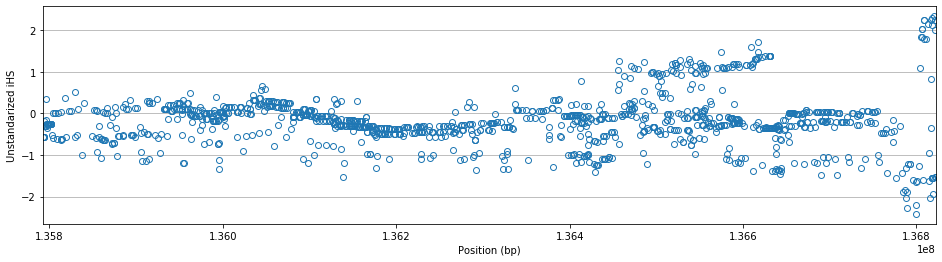

In [103]:
ihsPlot(score,pos_seg,'Unstandarized iHS')

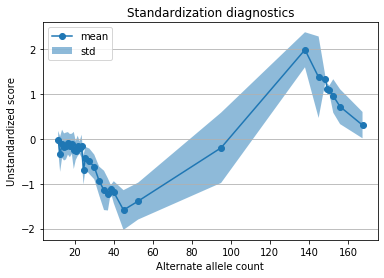

In [104]:
score_standardized, ac_bins = allel.standardize_by_allele_count(score, ac_seg[:,1])

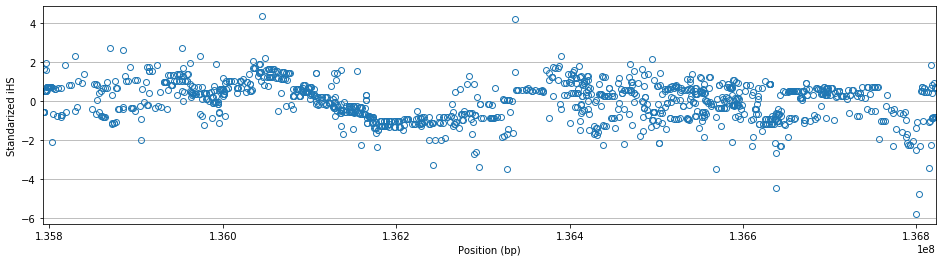

In [105]:
ihsPlot(score_standardized,pos_seg,'Standarized iHS')

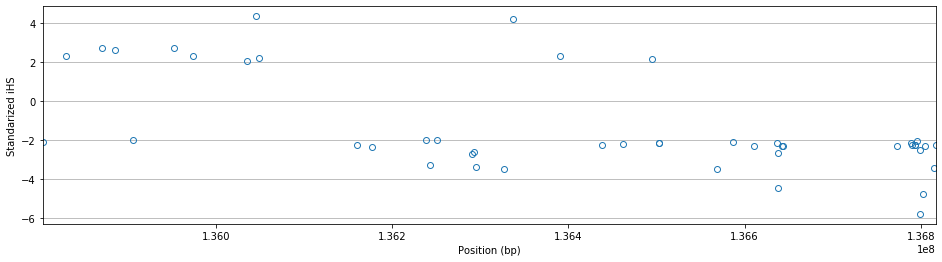

In [106]:
ihsPlot(score_standardized[(score_standardized > 2) | (score_standardized < -2)],pos_seg[(score_standardized > 2) | (score_standardized < -2)],'Standarized iHS')